In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
# make data

N_SAMPLES = 5000 # number of data points/samples
NUM_FEATURES = 2 # number of features to represent data
NUM_CLASSES = 4 # number of output labels for each input data
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=N_SAMPLES,
                                                    n_features=NUM_FEATURES,
                                                    centers=NUM_CLASSES,
                                                    cluster_std=2.5,
                                                    random_state=RANDOM_SEED
)

X_tensor, y_tensor = torch.tensor(X_blob, dtype=torch.float32), torch.tensor(y_blob, dtype=torch.long)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_tensor, y_tensor, train_size=0.8)

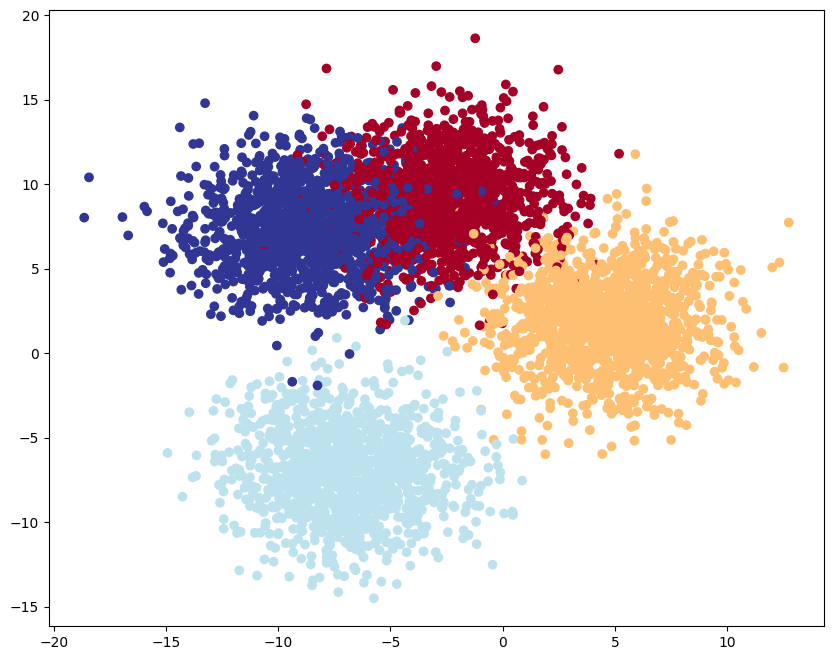

In [ ]:
# visualize the data
plt.figure(figsize=(10,8))
plt.scatter(x=X_blob[:, 0], y=X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
# a multiclass classification model
torch.manual_seed(RANDOM_SEED)
class MultiClassClassificationModel(nn.Module):
    def __init__(self):
        """
        inherits methods and functionalities from nn.Module
        self.layer_n(in_features, out_features): number of nodes that n layer takes and number of output values it gives
            each layer input features must match the output features of the previous layer
            nn.Linear also sets weights and bias withotu needing to initalize them explicitly
        """
        super(MultiClassClassificationModel, self).__init__()

        self.layer_1 = nn.Linear(2, 8)
        self.layer_2 = nn.Linear(8, 16)
        self.layer_3 = nn.Linear(16, 16)
        self.layer_4 = nn.Linear(16, 4)

    def forward(self, x):
        """
        args:
            - x: input data

        x = F.relu(layer(x)): using pytorch's function relu as activation function and passing data into the layer initializied in init method
        returns:
            - a final layer that outputs with activations and linear methods applied across all the previous layers
        """
        # using F.relu for activation
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        x = F.relu(self.layer_3(x))
        x = self.layer_4(x)
        return x


In [ ]:
torch.manual_seed(RANDOM_SEED)

# instantiate the model
multiclass_model_0 = MultiClassClassificationModel()

# optimizer: using Adam optimizer
optimizer = optim.SGD(multiclass_model_0.parameters(), lr=0.01)

# criterion: using cross entropy loss that works for multiclass classification
criterion = nn.CrossEntropyLoss()


# num epocs: number of training loops for the training model to learn
NUM_EPOCHS = 100



In [ ]:
def accuracy_fn(y_preds, y_true):
    """
    gives how accurate the model is by comparining the predictions with true values

    y_preds: predictions made by the values
    y_true: actual labels of the data

    returns accuracy value by using the true positives or false negatives and the dividing it by the total predictions
    """
    correct = torch.eq(y_preds, y_true).sum().item()
    return (correct / len(y_preds)) * 100

train_accuracy: 17.6000 | test_loss: 1.3912


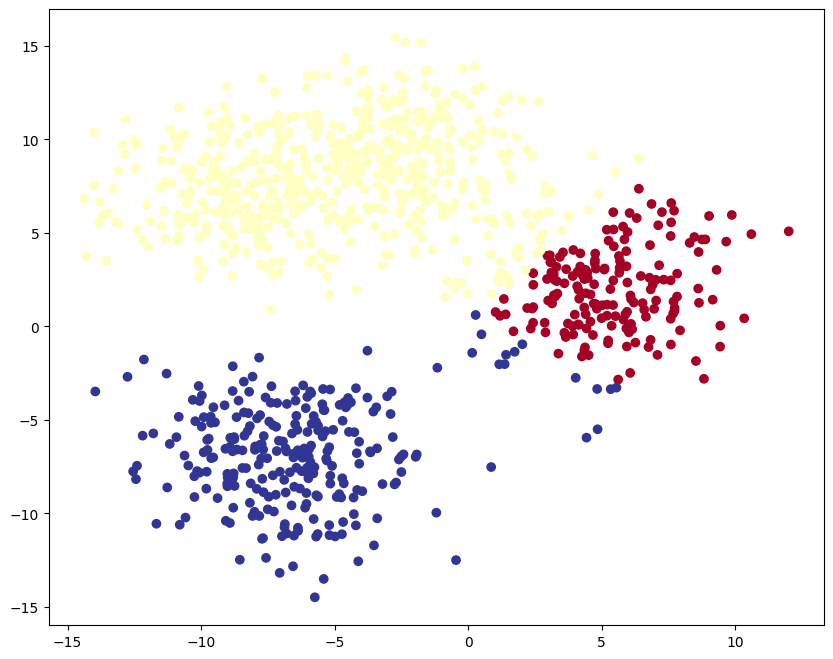

In [ ]:
torch.manual_seed(RANDOM_SEED)

# testing before trianing the model
with torch.inference_mode():
        y_pre_train = multiclass_model_0(X_blob_test)
        pre_train_loss = criterion(y_pre_train, y_blob_test)
        pre_train_predictions = torch.argmax( (torch.softmax(y_pre_train, dim=1)), dim=1)
        test_accuracy = accuracy_fn(pre_train_predictions, y_blob_test)

# visualize the data
print(f"train_accuracy: {test_accuracy:.4f} | test_loss: {pre_train_loss:.4f}")

plt.figure(figsize=(10, 8))
plt.scatter(x=X_blob_test[:, 0], y=X_blob_test[:, 1], c=pre_train_predictions, cmap=plt.cm.RdYlBu)

In [ ]:
torch.manual_seed(RANDOM_SEED)
# training the model
for epoch in range(NUM_EPOCHS):
    multiclass_model_0.train() # set the model to train model
    optimizer.zero_grad() # reset the optimnizer to 0

    y_train_logits = multiclass_model_0(X_blob_train) # thr raw outputs of the model are logits
    loss = criterion(y_train_logits, y_blob_train) # calculating the loss values of the niodel

    y_train_preds = torch.softmax(y_train_logits, dim=1) # converting logits to prediction probabilities
    y_train_pred_labels = torch.argmax(y_train_preds, dim=1)

    train_accuracy = accuracy_fn(y_train_pred_labels, y_blob_train)

    loss.backward() # back propagation
    optimizer.step() # adjust the parameters

    multiclass_model_0.eval()
    with torch.inference_mode():
        y_test_logits = multiclass_model_0(X_blob_test)
        test_loss = criterion(y_test_logits, y_blob_test)
        test_predictions = torch.argmax( (torch.softmax(y_test_logits, dim=1)), dim=1)
        test_accuracy = accuracy_fn(test_predictions, y_blob_test)

    if epoch % 10 == 0:
        print(f"epoch: {epoch} | train_loss: {loss:.4f} | train_accuracy: {train_accuracy:.4f} | test_loss: {test_loss:.4f} | test_accuracy: {test_accuracy:.4f}")



epoch: 0 | train_loss: 1.3823 | train_accuracy: 19.7750 | test_loss: 1.3744 | test_accuracy: 17.8000
epoch: 10 | train_loss: 1.2403 | train_accuracy: 51.0000 | test_loss: 1.2355 | test_accuracy: 54.8000
epoch: 20 | train_loss: 1.1262 | train_accuracy: 75.4250 | test_loss: 1.1182 | test_accuracy: 74.6000
epoch: 30 | train_loss: 1.0190 | train_accuracy: 86.1250 | test_loss: 1.0081 | test_accuracy: 86.6000
epoch: 40 | train_loss: 0.9174 | train_accuracy: 89.9000 | test_loss: 0.9049 | test_accuracy: 90.1000
epoch: 50 | train_loss: 0.8197 | train_accuracy: 90.8000 | test_loss: 0.8068 | test_accuracy: 91.2000
epoch: 60 | train_loss: 0.7256 | train_accuracy: 91.5500 | test_loss: 0.7130 | test_accuracy: 91.9000
epoch: 70 | train_loss: 0.6375 | train_accuracy: 91.8500 | test_loss: 0.6260 | test_accuracy: 92.4000
epoch: 80 | train_loss: 0.5594 | train_accuracy: 92.1750 | test_loss: 0.5494 | test_accuracy: 92.9000
epoch: 90 | train_loss: 0.4933 | train_accuracy: 92.3750 | test_loss: 0.4848 | test

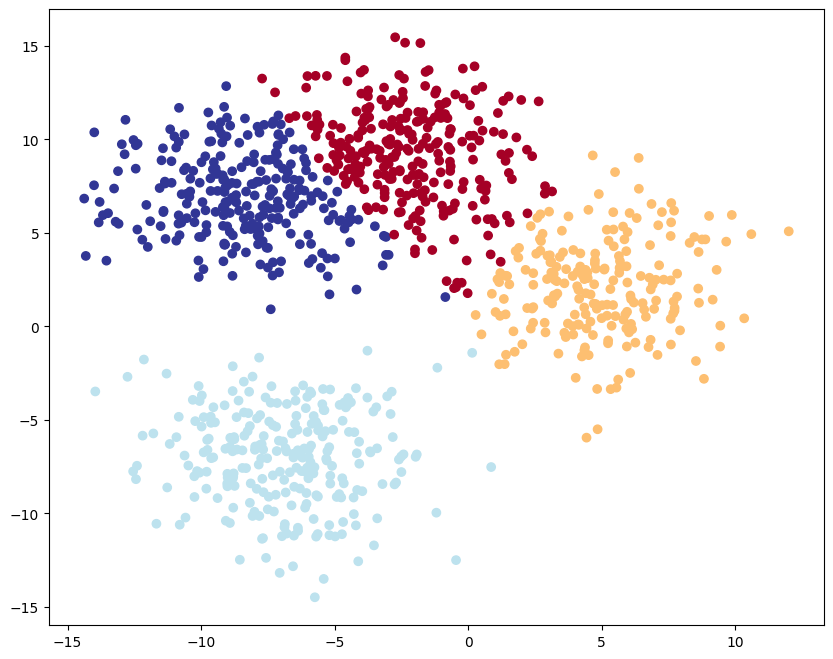

In [ ]:
torch.manual_seed(RANDOM_SEED)

multiclass_model_0.eval()
# testing before trianing the model
with torch.inference_mode():
        y_test_2 = multiclass_model_0(X_blob_test)
        train_loss_2 = criterion(y_test_2, y_blob_test)
        test_predictions = torch.argmax( (torch.softmax(y_test_2, dim=1)), dim=1)
        train_accuracy = accuracy_fn(test_predictions, y_blob_test)

plt.figure(figsize=(10, 8))
plt.scatter(x=X_blob_test[:, 0], y=X_blob_test[:, 1], c=test_predictions, cmap=plt.cm.RdYlBu)

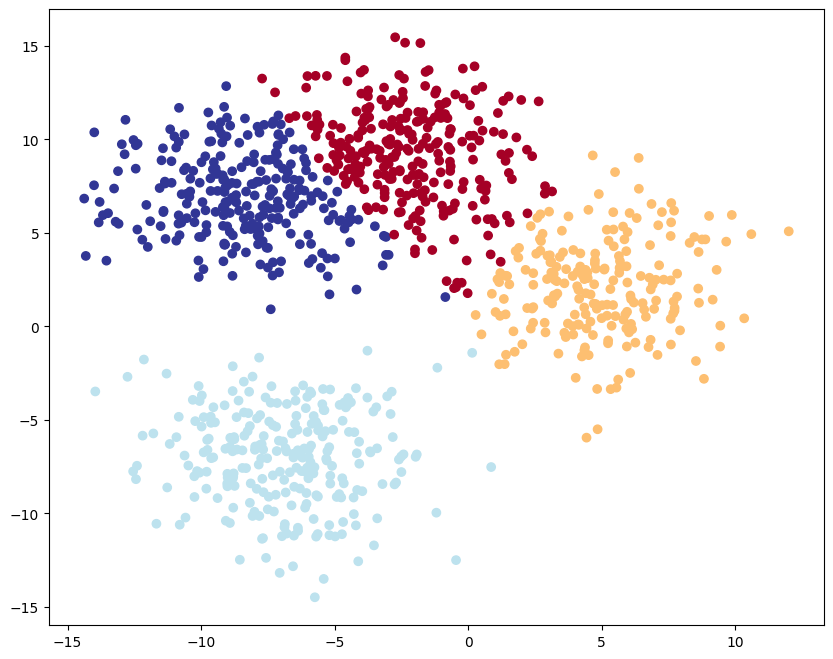

In [ ]:
# visualize the data
plt.figure(figsize=(10, 8))
plt.scatter(x=X_blob_test[:, 0], y=X_blob_test[:, 1], c=test_predictions, cmap=plt.cm.RdYlBu)

In [ ]:

# import plot helper functions
import requests

from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper functions already exists")
else:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper functions already exists


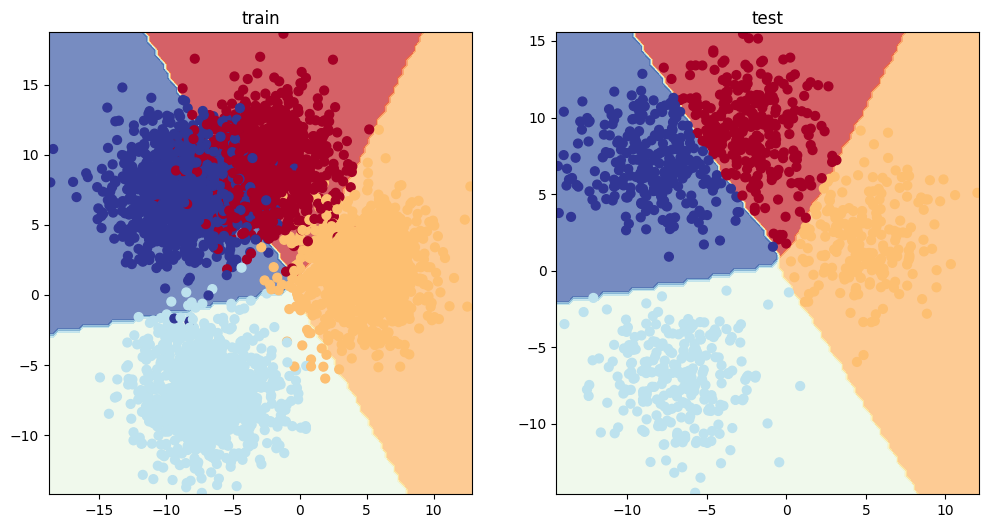

In [ ]:
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(multiclass_model_0, X_blob_train, y_blob_train)

plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(multiclass_model_0, X_blob_test, test_predictions)

plt.show()

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.9/960.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 783.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
from torchmetrics import Accuracy
model_selection = Accuracy(task="multiclass", num_classes=4)
model_selection(test_predictions, y_blob_test)

tensor(0.9330)